In [22]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

In [9]:
bj = pd.read_csv('../data/beijing.csv',) 
bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16210 entries, 0 to 16209
Data columns (total 8 columns):
城区        16210 non-null object
卧室数       16210 non-null int64
客厅数       16210 non-null int64
房屋面积      16210 non-null float64
楼层        16210 non-null object
是否临近地铁    16210 non-null int64
是否学区房     16210 non-null int64
单位面积价格    16210 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.1+ MB


再pandas中object是str类型也是类别类型
某些int类型也是类别型的数据
房屋面积是连续

数据分析关心的因变量Y是**单位面积价格**。首先二手房的市场价格是由多个因素决定的一个结果，当前数据一共16210个样本。

In [10]:
bj

,城区,卧室数,客厅数,房屋面积,楼层,是否临近地铁,是否学区房,单位面积价格
0,朝阳,1,0,46.06,中层,1,0,48850
1,朝阳,1,1,59.09,中层,1,0,46540
2,海淀,5,2,278.95,高层,1,1,71662
3,海淀,3,2,207.00,高层,1,1,57972
4,丰台,2,1,53.32,低层,1,1,71268
...,...,...,...,...,...,...,...,...
16205,朝阳,3,1,76.33,中层,1,0,52405
16206,朝阳,3,1,76.42,中层,1,0,52343
16207,朝阳,2,1,61.79,高层,1,0,50170
16208,朝阳,1,1,42.89,高层,1,0,52693


In [11]:
bj.columns

Index(['城区', '卧室数', '客厅数', '房屋面积', '楼层', '是否临近地铁', '是否学区房', '单位面积价格'], dtype='object')

当前数据采样的特征一共8个,内部因素从'卧室数', '客厅数', '房屋面积', '楼层'开展研究,外部因素从 '城区','是否临近地铁', '是否学区房'开展研究。当前特征存在一些局限性,比如说可以添加'周围购物中心距离','就业中心距离','距离公园距离','医疗资源','教育资源','距离农贸市场距离','空气质量','容积率','犯罪率','噪音','建立时间','人均收入'等等其它因素。

In [12]:
bj.describe()

,卧室数,客厅数,房屋面积,是否临近地铁,是否学区房,单位面积价格
count,16210.000000,16210.000000,16210.000000,16210.000000,16210.000000,16210.000000
mean,2.166194,1.221407,91.746598,0.827822,0.303085,61151.810919
std,0.809907,0.532048,44.000768,0.377546,0.459606,22293.358147
min,1.000000,0.000000,30.060000,0.000000,0.000000,18348.000000
25%,2.000000,1.000000,60.000000,1.000000,0.000000,42812.250000
50%,2.000000,1.000000,78.830000,1.000000,0.000000,57473.000000
75%,3.000000,2.000000,110.517500,1.000000,1.000000,76099.750000
max,5.000000,3.000000,299.000000,1.000000,1.000000,149871.000000


In [13]:
#检测类别值
bj.卧室数.unique(),bj.客厅数.unique(),(bj.房屋面积.max(),bj.房屋面积.min())

(array([1, 5, 3, 2, 4]), array([0, 1, 2, 3]), (299.0, 30.06))

In [8]:
bj.城区.unique()

array(['朝阳', '海淀', '丰台', '西城', '东城', '石景山'], dtype=object)

从以上数据中可以获取再本平台售卖的二手房屋信息如下:
- 卧室数量1-5个之间
- 客厅数量0-3个之间
- 房屋面积再30-299平方之间
- 是否邻近地铁
    - 1 邻近
    - 0 不邻近
    - 售卖的房源中有82.78%都是邻近地铁的
- 是否学区房
    - 1 是
    - 0 否
    - 售卖的房源中有30.3%都是学区房,学区房资源比较稀少
- 分区城区主要是'朝阳', '海淀', '丰台', '西城', '东城', '石景山'六个区域。

### 二手房价格分布

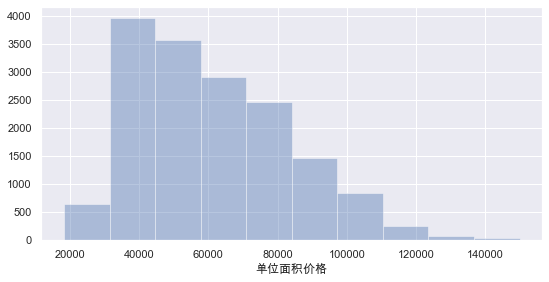

In [21]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
sns.distplot(a=bj.单位面积价格,kde=False,bins=10)

In [18]:
#获取单位面积价格的最低房价的房屋信息
min_prcie = bj.单位面积价格.min()

#python3.7 
min_price_info = bj.query(f"单位面积价格=={min_prcie}")
min_price_info

,城区,卧室数,客厅数,房屋面积,楼层,是否临近地铁,是否学区房,单位面积价格
2738,丰台,2,2,100.83,高层,0,0,18348


In [19]:
#房产总价
min_price_info.房屋面积 * min_price_info.单位面积价格

2738    1850028.84
dtype: float64

In [20]:
#获取单位面积价格的最高房价的房屋信息
max_prcie = bj.单位面积价格.max()

#python3.7 
max_price_info = bj.query(f"单位面积价格=={max_prcie}")
max_price_info

,城区,卧室数,客厅数,房屋面积,楼层,是否临近地铁,是否学区房,单位面积价格
12788,西城,3,1,77.4,低层,1,0,149871


In [21]:
#房产总价
max_price_info.房屋面积 * max_price_info.单位面积价格

12788    11600015.4
dtype: float64

当前数据中价格最低的是**丰台区**,面积**100.83**平方米,套型**两室两厅**,单位面积价格**18,348**元/平方米,总价格**1,850,028.84**元人名币。

当前数据中价格最高的是**西城区**,面积**77.4**平方米,套型**三室一厅**,单位面积价格**149,871**元/平方米,总价格**11,600,015.4**元人名币。

### 描述性分析

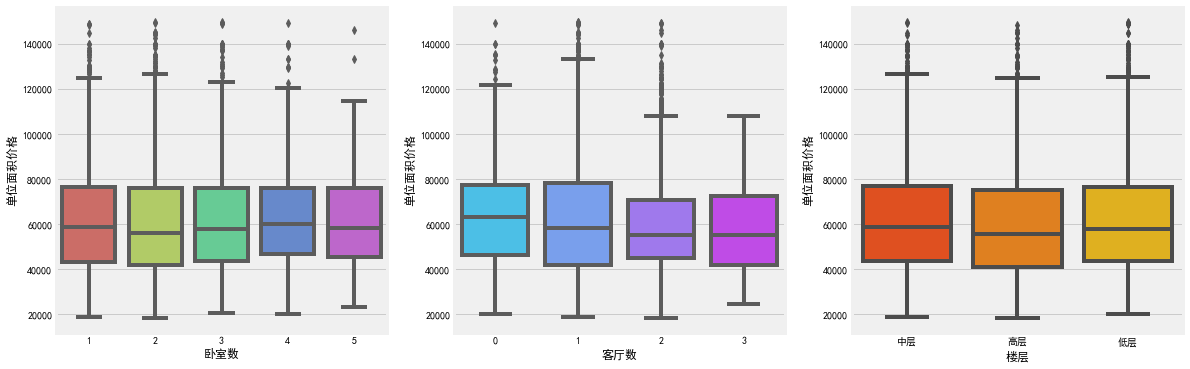

In [26]:
#内部因素是否影响房价
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(3*6,6))
#卧室数量和房价差异
sns.boxplot(x='卧室数',y='单位面积价格',data=bj,ax=ax1,palette='hls')
#客厅数量和房价差异
sns.boxplot(x='客厅数',y='单位面积价格',data=bj,ax=ax2,palette='cool')
#楼层和房价差异
sns.boxplot(x='楼层',y='单位面积价格',data=bj,ax=ax3,palette='autumn')

从内部因素中可以观察出,单位面积房价受到"卧室数","客厅数","楼层"的影响并不显著。

In [27]:
bj.columns

Index(['城区', '卧室数', '客厅数', '房屋面积', '楼层', '是否临近地铁', '是否学区房', '单位面积价格'], dtype='object')

In [30]:
bj['总价格'] = bj.房屋面积 * bj.单位面积价格
bj.head(2)

,城区,卧室数,客厅数,房屋面积,楼层,是否临近地铁,是否学区房,单位面积价格,总价格
0,朝阳,1,0,46.06,中层,1,0,48850,2250031.0
1,朝阳,1,1,59.09,中层,1,0,46540,2750048.6


### 查看房价和面积之间的关系

In [31]:
#设置一个分箱规则
bins = [30,60,90,120,180,300]
bj['面积分组'] = pd.cut(bj.房屋面积,bins)
bj.head(2)

,城区,卧室数,客厅数,房屋面积,楼层,是否临近地铁,是否学区房,单位面积价格,总价格,面积分组
0,朝阳,1,0,46.06,中层,1,0,48850,2250031.0,"(30, 60]"
1,朝阳,1,1,59.09,中层,1,0,46540,2750048.6,"(30, 60]"


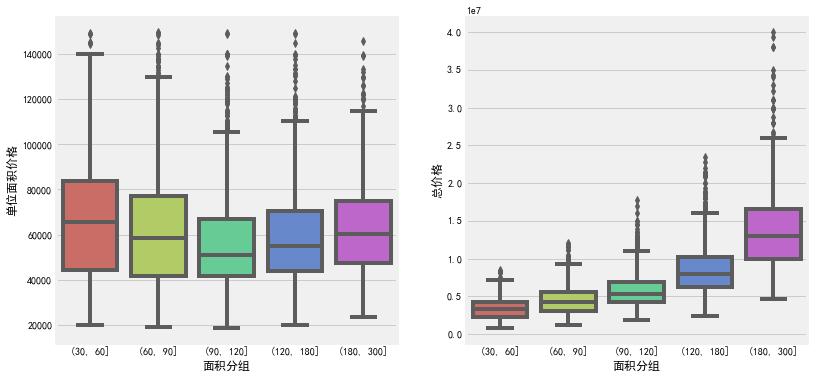

In [36]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))
sns.boxplot(data=bj,x='面积分组',y='单位面积价格',ax=ax1,palette='hls')
sns.boxplot(data=bj,x='面积分组',y='总价格',ax=ax2,palette='hls')

房产的总价和面积关系非常显著。

### 外部因素

区域和价格

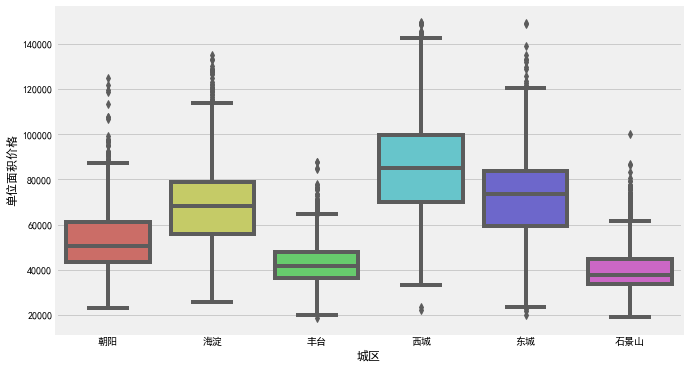

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=bj,x='城区',y='单位面积价格',palette='hls')

不同区域对房子单位面积价格的影响比较显著,城区价格偏高,丰台和石景山价格偏低

地铁和学校对房价的影响

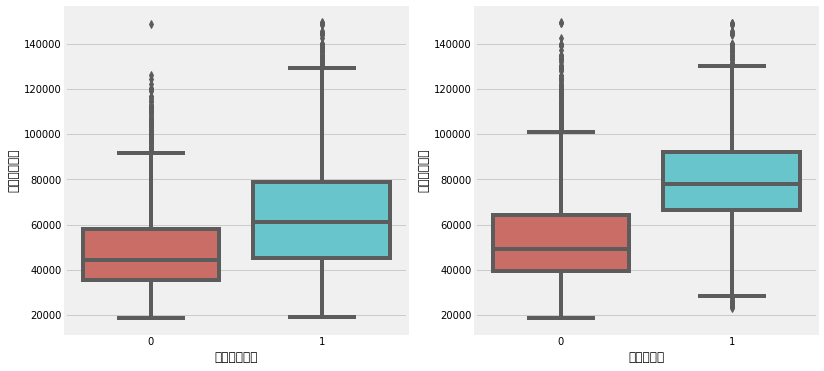

In [11]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))#
sns.boxplot(data=bj,x='是否临近地铁',y='单位面积价格',ax=ax1,palette='hls')
sns.boxplot(data=bj,x='是否学区房',y='单位面积价格',ax=ax2,palette='hls')

地铁房和学区房的价格比其它的区域偏高

综上所述,外部因素比内部因素对单位面积价格更加具有影响性

### 以石景山的价格为基准,计算其它区域价格高出比例

In [12]:
sjs_total = bj.query("城区 == '石景山'").单位面积价格
ft_total = bj.query("城区 == '丰台'").单位面积价格
cy_total = bj.query("城区 == '朝阳'").单位面积价格
dc_total = bj.query("城区 == '东城'").单位面积价格
xc_total = bj.query("城区 == '西城'").单位面积价格
hd_total = bj.query("城区 == '海淀'").单位面积价格

In [13]:
#丰台
print(ft_total.mean() / sjs_total.mean())
#朝阳
print(cy_total.mean() / sjs_total.mean())
#东城
print(dc_total.mean() / sjs_total.mean())
#西城
print(xc_total.mean() / sjs_total.mean())
#海淀
print(hd_total.mean() / sjs_total.mean())

1.0549562093075882
1.310615567733059
1.7842925031433456
2.1266168585369747
1.7066992013682074


以石景山的单位面积价格为基准：
- 丰台的平均单位房价的差距系数是1.055,价格最接近
- 西城的平均单位房价的差距系数是2.127,价格差距最大

### 预测需求如下

- 现有一户人家需要为孩子在海淀准备一套学区房,85平米两室两厅,临近地铁,楼层需要高层,那么每平方需要多少钱,大约总共需要花费多少钱。

##### 回归
- 线性回归
    - 小二乘回归
    - 随机批量梯度下降
    - 岭回归
    - 拉索回归
    - 戴明函数回归
    - 奇异值分解回归
    - 弹性网回归
- 零一回归
    - 对数回归
- 生存回归
    - 电灯泡，用多少长时间
- 计数回归
    - Y是整数,根据时序计数的
- 定序回归
    - 分类的类别开始变多
- 交叉回归
    - 对于类别型数据的回归方式
- 均值回归
    - 最近的数据的平均值

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [18]:
data = bj.copy()

In [19]:
object_col = data.select_dtypes(include=['object']).columns

for c in object_col:
    data[c]=data[c].astype('category').cat.codes

In [20]:
features = data.loc[:,['城区','是否临近地铁','是否学区房']]
labels = data.loc[:,['单位面积价格']]

In [23]:
#CART二分类树 gini不纯度  熵
estimator=GradientBoostingRegressor()
#先打印树状图,n-1是深度   
param_grid = {"max_depth":[1,2,3,4,5,6,7],'min_samples_leaf':[4,5,6,7,8,9,10]}
gc = GridSearchCV(estimator,param_grid,cv=4,n_jobs=12).fit(features,labels)


In [24]:
gc.score(features,labels)

0.5975590270744588

In [25]:
y_pred = gc.best_estimator_.predict(features)


In [26]:
#RMSE  均方误差  
np.sqrt(mean_squared_error(labels,y_pred))

14142.076817963258

BI准确度低是常态,准确度太高是变态

In [27]:
bj.城区.unique(),bj.城区.astype('category').cat.codes.unique()

(array(['朝阳', '海淀', '丰台', '西城', '东城', '石景山'], dtype=object),
 array([2, 3, 1, 5, 0, 4]))

In [28]:
X_test = [[3,1,1]]
#光华管理学院统计学研究中心  93000元
gc.best_estimator_.predict(X_test)

array([78749.62647352])

- 会员整体指标
- 会员营销指标
- 会员活跃度检测
- 会员价值检测
- 会员异常指标

- 商品的库存
- 销售预测
- 市场分析
- 促销分析

- 站内流量
- 站外流量

'工业'分析

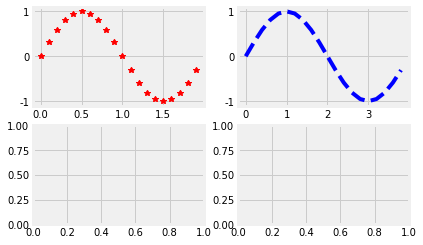

In [7]:
t=np.arange(0.0,2.0,0.1)
s=np.sin(t*np.pi)
#figure,ax=plt.subplots(2,2)
ax[0][0].plot(t,s,'r*')
ax[0][1].plot(t*2,s,'b--')
figure